In [18]:
import pandas as pd
from datetime import datetime

In [2]:
df = pd.read_csv('./data/USDT-BTC_15min_2016-01-01_2017-11-28.tsv', sep='\t')

In [3]:
selected = df.iloc[-10000:].reset_index()

open_data = selected['open']
high_data = selected['high']
low_data = selected['low']
close_data = selected['close']
dates = selected['date']

# Plotly

In [ ]:
import plotly.offline as py
import plotly.graph_objs as go
py.init_notebook_mode()

In [ ]:
from plotly.figure_factory import create_candlestick

trace0 = go.Scatter(
    x = selected.date,
    y = selected.open + 400,
    mode = 'lines',
    name = 'lines'
)

fig = create_candlestick(selected.open, selected.high, selected.low, selected.close, dates=selected.date)

# fig.data.append(trace0)


py.iplot(fig, filename='finance/aapl-candlestick', validate=False)

# Plotly 2

In [ ]:
import plotly.graph_objs as go

# import pandas_datareader as web
from datetime import datetime

trace = go.Ohlc(x=selected.index,
                open=selected.open,
                high=selected.high,
                low=selected.low,
                close=selected.close)

layout = go.Layout(
    xaxis = dict(
        rangeslider = dict(
            visible = False
        )
    )
)

data = [trace]

fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='OHLC without Rangeslider')

# Bokeh

In [ ]:
from bokeh.plotting import figure, show, output_file

def plotCandles(ohlc):
    if ohlc.shape[0] < 2:
        return
    
    df = ohlc.copy().sort_values('timestamp').reset_index().drop('index', axis=1)
    tools = "pan,wheel_zoom,box_zoom,reset,save"
    
    inc = df.close > df.open
    dec = df.open > df.close
    w = 15 * 60 * 1000 # 15 mins  ms
    

In [17]:
from math import pi

import pandas as pd

from bokeh.plotting import figure, show, output_file

df = selected
df["date"] = pd.to_datetime(df["date"])

inc = df.close > df.open
dec = df.open > df.close

timestamps = df.timestamp.tolist()
w = timestamps[1] - timestamps[0]

TOOLS = "pan,wheel_zoom,box_zoom,reset,save"

p = figure(x_axis_type="datetime", tools=TOOLS, plot_width=1000, title = "MSFT Candlestick")
p.xaxis.major_label_orientation = pi/4
p.grid.grid_line_alpha=0.3

p.segment(df.date, df.high, df.date, df.low, color="black")
p.vbar(df.date[inc], w, df.open[inc], df.close[inc], fill_color="#D5E1DD", line_color="black")
p.vbar(df.date[dec], w, df.open[dec], df.close[dec], fill_color="#F2583E", line_color="black")

show(p)  # open a browser

# Matplotlib magic

In [ ]:
%matplotlib notebook

In [39]:
from matplotlib.finance import candlestick2_ohlc
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator, FuncFormatter 
import datetime as datetime
import numpy as np

def plotCandles(ohlc):
    def mydate(x, _):
        try:
            return xdate[int(x)]
        except IndexError:
            return ''

    fig, ax = plt.subplots(figsize=(9, 6))
    candlestick2_ohlc(ax, ohlc['open'], ohlc['high'], ohlc['low'], ohlc['close'], width=0.6)

    xdate = [datetime.datetime.fromtimestamp(i) for i in ohlc['timestamp']]
    ax.xaxis.set_major_locator(MaxNLocator(6))
    ax.xaxis.set_major_formatter(FuncFormatter(mydate))

    fig.autofmt_xdate()
    fig.tight_layout()
    plt.show()

<IPython.core.display.Javascript object>


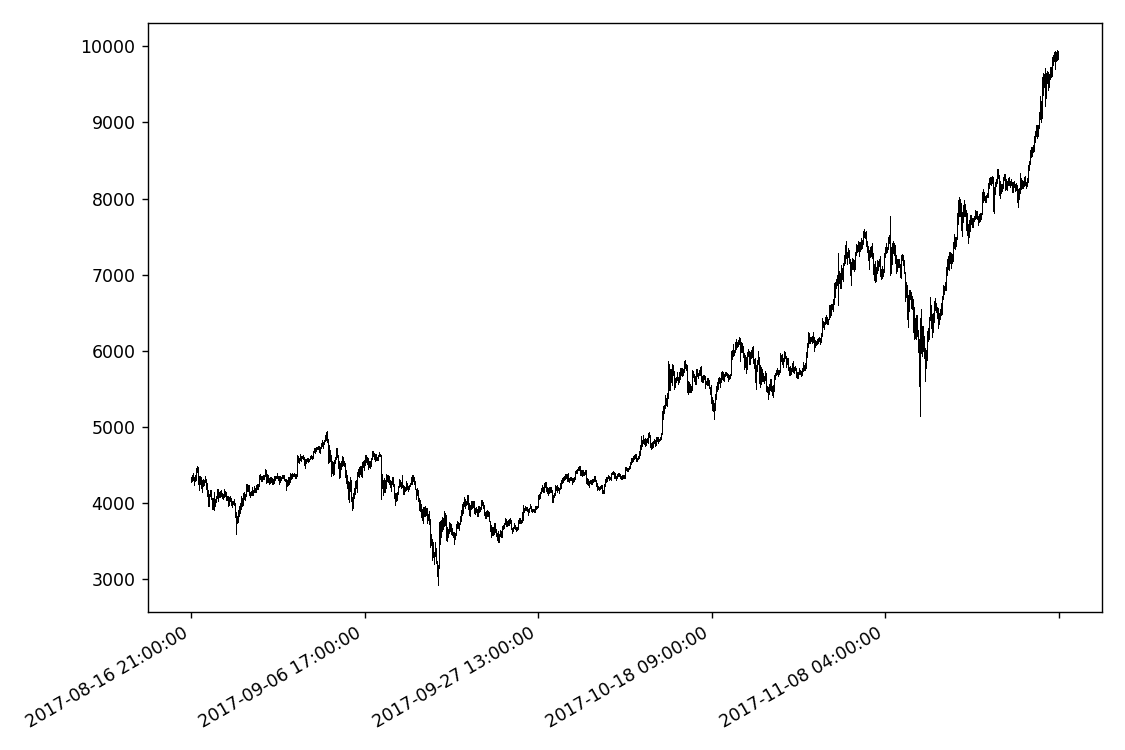

In [40]:
plotCandles(df)